# 라이브러리 로드

## 데이터 분석용 라이브러리

In [2]:
# 데이터 분석에 사용할 라이브러리
import pandas as pd
import numpy as np

In [3]:
import logging

logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

## 데이터 시각화용 라이브러리

In [4]:
# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# 데이터 로드

- survived
  - 생존 여부
  - 0이면 사망, 1이면 생존

- pclass
  - 객실 등급
  - 1이면 1등급, 2이면 2등급, 3이면 3등급

-  sex
  - 성별
  - male이면 남자, female이면 여자

- age
  - 나이

- sibsp
  - 함께 탑승한 형제 및 배우자 수

- parch
  - 함께 탑승한 자녀 및 부모 수

- fare
  - 요금

- embarked
  - 탑승지 이름 앞글자
  - C는 Cherbourg, Q는 Queenstown, S는 Southampton

- class
  - 객실 등급
  - First면 1등급, Second면 2등급, Third면 3등급

- who
  - 남자, 여자, 아이
  - man, woman, child

- adult_male
  - 성인 남자인지 여부
  - True면 성인 남자, False면 그외

- deck
  - 선실 번호 첫 알파벳
  - A, B, C, D, E, F, G

- embark_town
  - 탑승지 이름
  - Cherbourg, Queenstown, Southampton

- alive
  - 생존여부
  - no면 사망, yes면 생존

- alone
  - 혼자 탑승했는지 여부
  - True면 혼자 탑승, False면 가족과 함께 탑승

In [5]:
SEED = 42
df = sns.load_dataset('titanic')

print(df.shape)

(891, 15)


## 데이터 확인

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 타겟 데이터 확인

In [7]:
new_survived = pd.Categorical(df["survived"])
new_survived[:5]

[0, 1, 1, 1, 0]
Categories (2, int64): [0, 1]

In [8]:
new_survived = pd.Categorical(df["survived"])
new_survived = new_survived.rename_categories(["Died","Survived"])
print(new_survived[:5])
new_survived.describe()

['Died', 'Survived', 'Survived', 'Survived', 'Died']
Categories (2, object): ['Died', 'Survived']


,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


## 데이터 분리

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# 깊은 복사 -> X를 수정하더라도, df값이 변하지 않음
X = df.drop('survived', axis=1) # 깊은 복사 -> 함수로 썼을 때,
# 얕은 복사 -> y를 수정하면, df['suervived']의 값도 변경됨
y = df['survived'] # 얕은 복사 -> 함수가 아닌 경우

X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=SEED, test_size = 0.2)
X_tr = X_tr.reset_index(drop=True)
X_te = X_te.reset_index(drop=True)

X_tr.shape, X_te.shape

((712, 14), (179, 14))

In [11]:
new_survived = pd.Categorical(y_tr)
new_survived = new_survived.rename_categories(["Died","Survived"])
print(new_survived[:5])
new_survived.describe()

['Died', 'Died', 'Died', 'Died', 'Died']
Categories (2, object): ['Died', 'Survived']


,counts,freqs
categories,,
Died,444,0.623596
Survived,268,0.376404


# Data Cleaning
> 데이터를 올바르고 효율적으로 사용하기 위해서는 좋은 데이터를 사용해야합니다. 좋은 데이터는 완결성, 유일성, 통일성을 특정을 갖습니다.  
  
> 하지만 항상 결측치 제거, 이상치 제거, 데이터 정규화 등을 하는 것이 좋은 것은 아닙니다. 모델이나 데이터 분포 또는 분석 목적에 따라 Data Cleaning을 하는 것이 좋습니다.

- 완결성
> 결측값을 가능하면 제거해야 합니다.
- 유일성
> 중복 데이터가 있으면 안됩니다.
- 통일성
> 동일한 데이터형식 및 단위로 기록되어 있어야 합니다.
> 가능하면 정규화를 해야 합니다.    
> 이상치를 가능하면 제거해야 합니다.

## 중복 데이터 처리

In [12]:
# 중복제거
print(f'before: {df.shape}')
df.drop_duplicates(keep='first', inplace=True, ignore_index=True)
print(f'after: {df.shape}')
df.head(2)

before: (891, 15)
after: (784, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


## 결측치(Missing Value)
> 결측치는 직역하면 '값이 없는 것'을 의미합니다. 결측치는 사용하는 언어마다 여러가지로 표현됩니다.  

- NaN: Not a Number (숫자가 아닌)
- Null: 아무것도 존재하지 않음
- undefined: 정의되어 있지 않음

예를 들어서 설문조사를 했는데, 응답자가 10가지 질문 중에 4가지만 응답했다면 나머지 6가지는 결측치가 되는 것이다.   
- 결측치는 모두 제거할 경우, 막대한 데이터 손실을 불러일으킬 수 있음
- 결측치를 잘 못 대체할 경우, 데이터에서 편향(bias)이 생길 수 있음

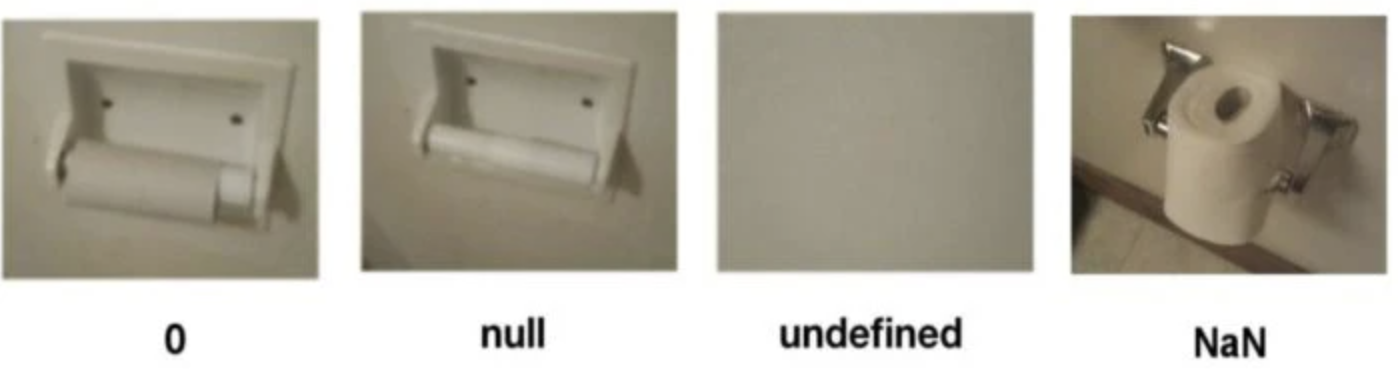

### 결측치 유형 파악

- 완전 무작위 결측(MCAR: Missing Completely At Random)
> X1, X2, X3라는 특성이 있다고 가정합시다. 이때, X2열의 결측치가 X1, X2, X3 열의 다른 값들과 아무런 상관관계가 없을 경우, 이를 완전 무작위 결측이라고 합니다.   
> 대부분의 결측치 처리 패키지는 이러한 유형의 결측치를 대상으로 하고 있으며, 데이터를 입력한 이가 실수를 했거나, 전상상의 에러가 난 경우입니다.
- 무작위 결측(MAR: Missing At Random)
> X1, X2, X3라는 특성이 있다고 가정합시다. 이때, X1이 True인 경우, X2는 결측치를 갖고, X1이 False인 경우, X2는 값을 가진다면,  
> 다시 말해 다른 특성의 값에 따라 결측치의 발생 확률이 계산된다면, 그러나 값자체의 상관관계는 알 수 없는 경우. 이를 무작위 결측이라고 합니다.
- 비무작위 결측(NMAR: Not Missing At Random)
> 위의 두가지 유형이 아닐 때, 비무작위 결측이라 합니다. 이 경우 결측치가 일어난 특성(X2)의 값이 다른 특성(X1)의 값과 상관관계가 있습니다.

예) 성별(X)을 사용해 체중(y)을 예측하는 모델을 구축하기 위해, 설문조사를 통해 Xy DataFrame을 구성했는데, y열에 결측치가 있다고 가정합시다.  
- 완전 무작위 결측
> 단순히 그냥. 체중을 응답하지 않았던 경우
> 즉, y가 누락된 이유는 다른 X, y값들과는 관련이 없다.
- 무작위 결측
> 여성(X)의 경우 체중에 잘 응답하지 않았던 경우  
> 즉, y가 누락된 것은 성별(X)에 영향을 받는다.  
- 비무작위 결측
> 체중이 무거운 사람들은 자신의 체중을 잘 응답하지 않는다.  
> 즉, y가 누락된 것은 y자체에 영향을 받았다.  

### 결측치 탐색

#### 통계 탐색

In [13]:
X_tr.info() # info()를 통해서 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       712 non-null    int64   
 1   sex          712 non-null    object  
 2   age          572 non-null    float64 
 3   sibsp        712 non-null    int64   
 4   parch        712 non-null    int64   
 5   fare         712 non-null    float64 
 6   embarked     710 non-null    object  
 7   class        712 non-null    category
 8   who          712 non-null    object  
 9   adult_male   712 non-null    bool    
 10  deck         158 non-null    category
 11  embark_town  710 non-null    object  
 12  alive        712 non-null    object  
 13  alone        712 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(3), object(5)
memory usage: 59.0+ KB


In [14]:
X_tr.isnull().sum().sum() # 전체 결측치 수

698

In [15]:
X_tr.isnull().sum() # 각 컬럼별 결측치 수

,0
pclass,0
sex,0
age,140
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0
adult_male,0


In [16]:
X_tr.isnull().sum().sort_values(ascending=False) # 각 컬럼별 결측치 수

,0
deck,554
age,140
embarked,2
embark_town,2
pclass,0
sex,0
sibsp,0
parch,0
fare,0
class,0


In [17]:
(X_tr.isnull().sum() / X_tr.shape[0]).round(4).sort_values(ascending=False) # 각 걸럼별 결측치 비율

,0
deck,0.7781
age,0.1966
embarked,0.0028
embark_town,0.0028
pclass,0.0000
sex,0.0000
sibsp,0.0000
parch,0.0000
fare,0.0000
class,0.0000


#### 그래프 탐색

<Axes: >

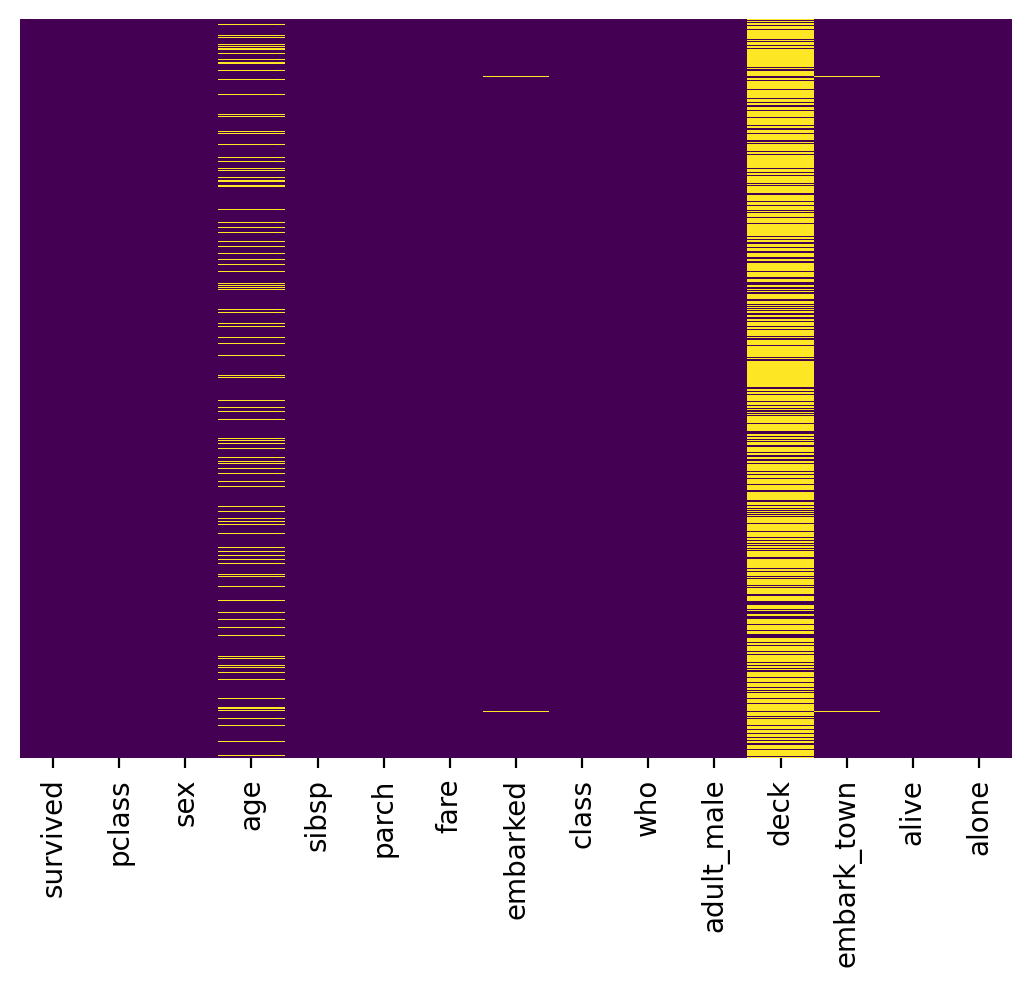

In [18]:
# checking null values using the heatmap for better results
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Text(0.5, 1.0, 'Total Missing Value (%)')

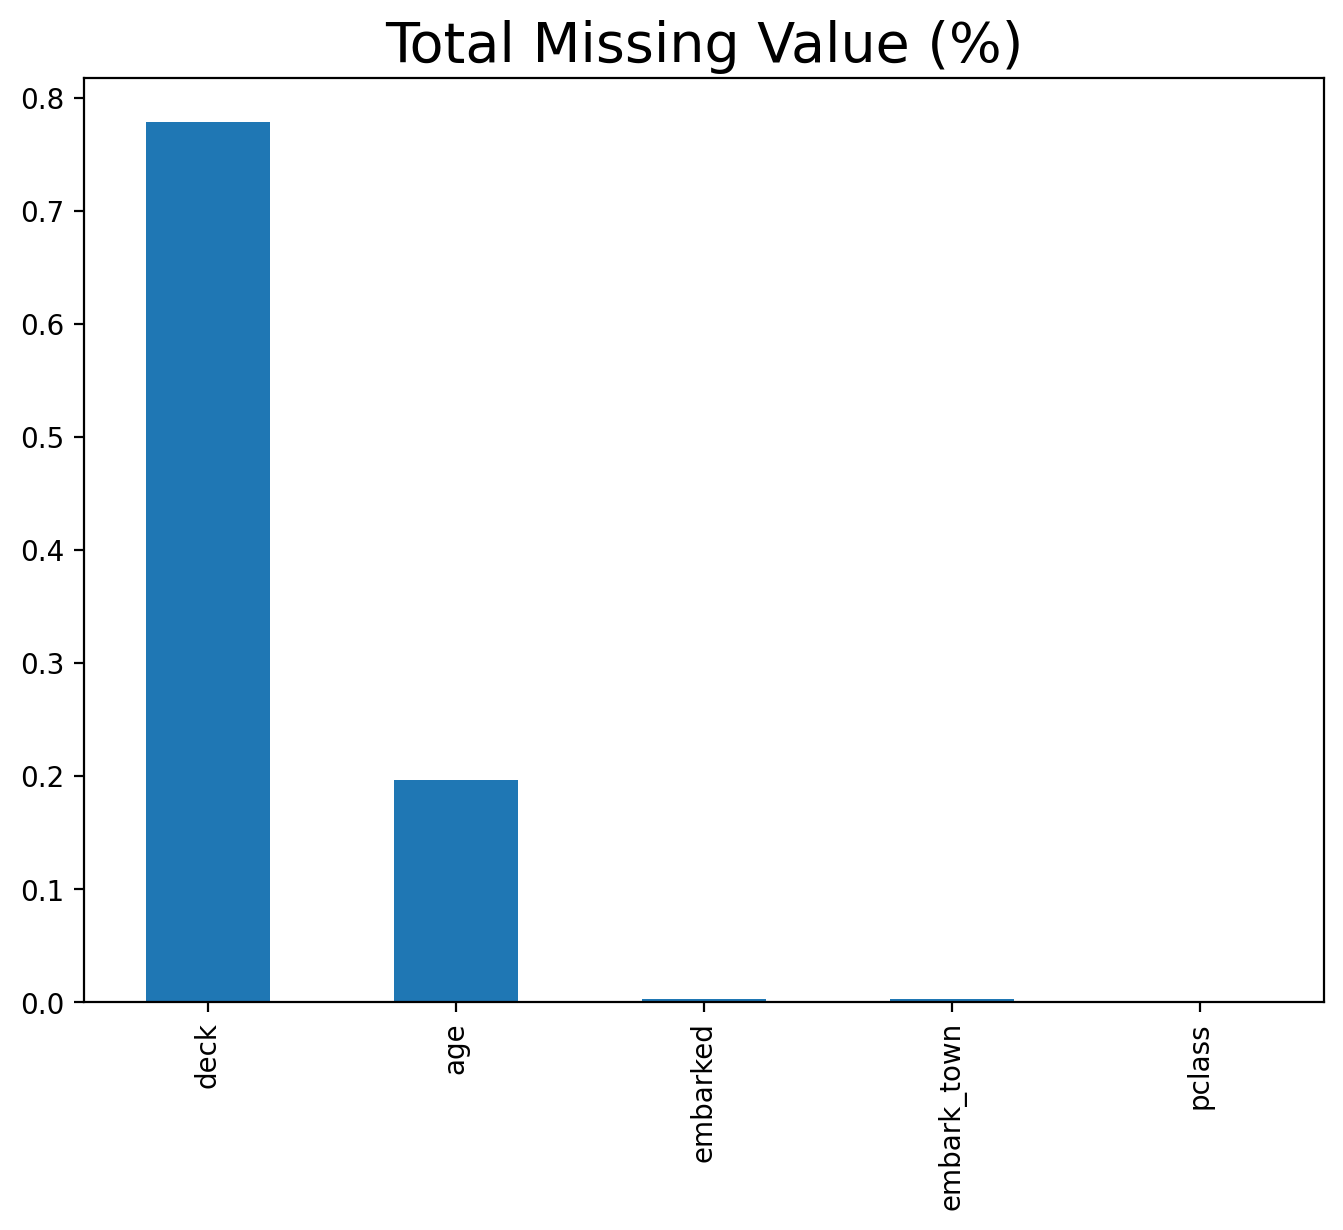

In [19]:
# 전체 정렬된 컬럼별 결측치 비율 데이터
percent = (X_tr.isnull().sum()/X_tr.isnull().count()).sort_values(ascending=False)

# 상위 5개의 데이터를 조회 -> 결측치가 있는 데이터만 있음 -> shape (5,1)
percent_data = percent.head()
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

In [23]:
X_tr['hasDeck'] = X_tr['deck'].isnull()\
  .apply(lambda x: 0 if x == True else 1)

X_tr['hasAge'] = X_tr['age'].isnull()\
  .apply(lambda x: 0 if x == True else 1)

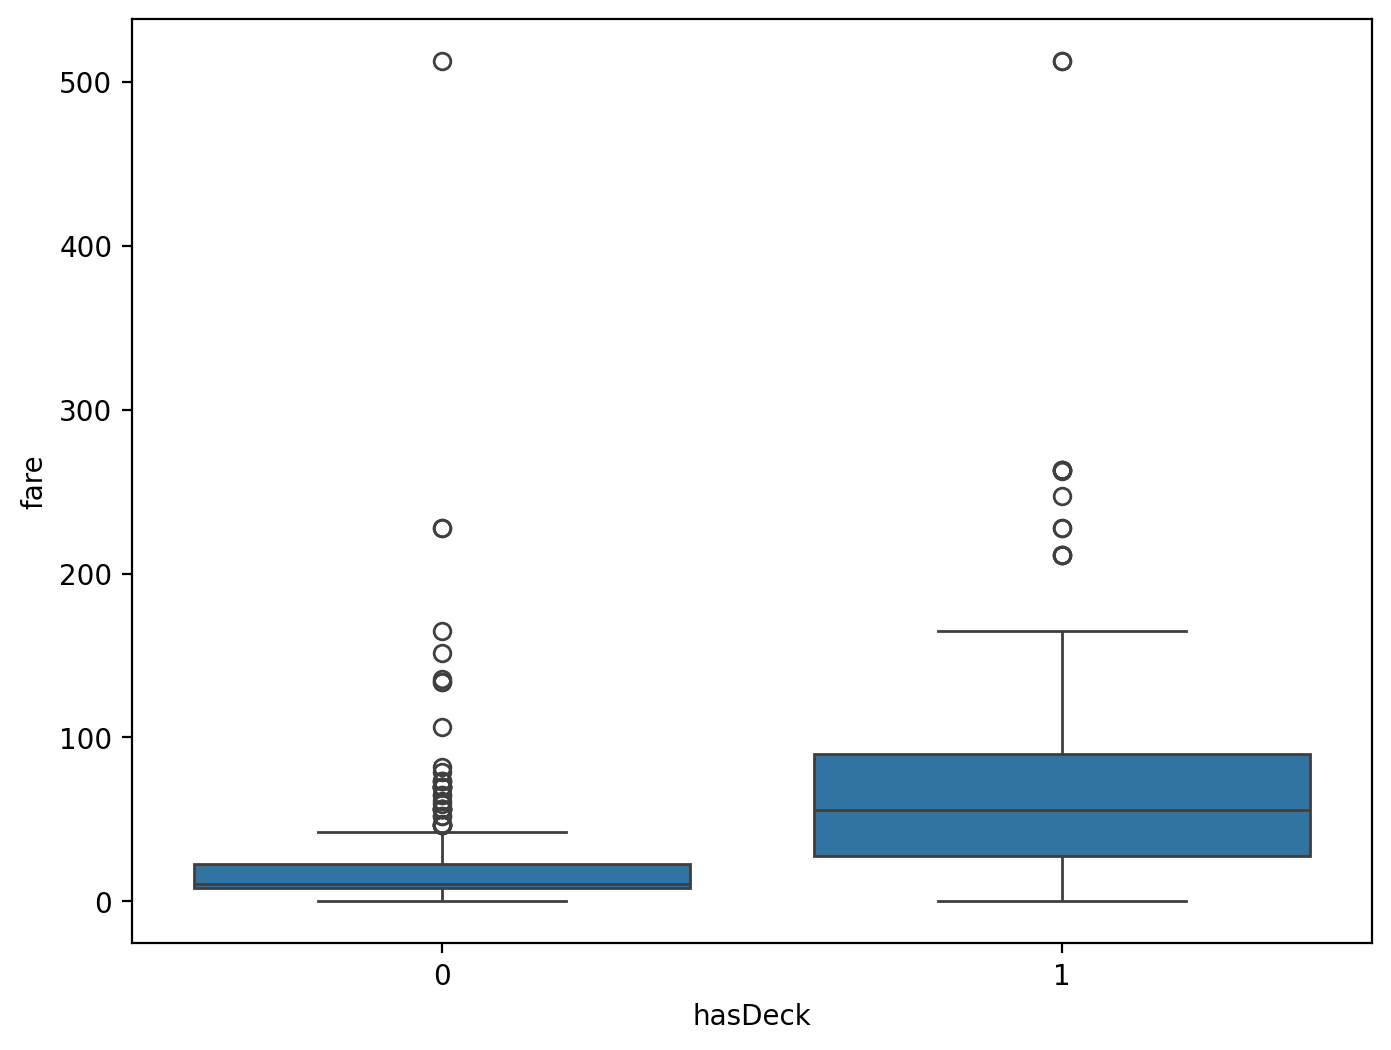

In [24]:
data = pd.concat(
    [X_tr['fare'], X_tr['hasDeck']], axis=1)


f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='hasDeck', y="fare", data=data)

위의 그래프를 보면 cabin(deck)의 값이 있는 사람들이 fare가 높은 경향이 있다.

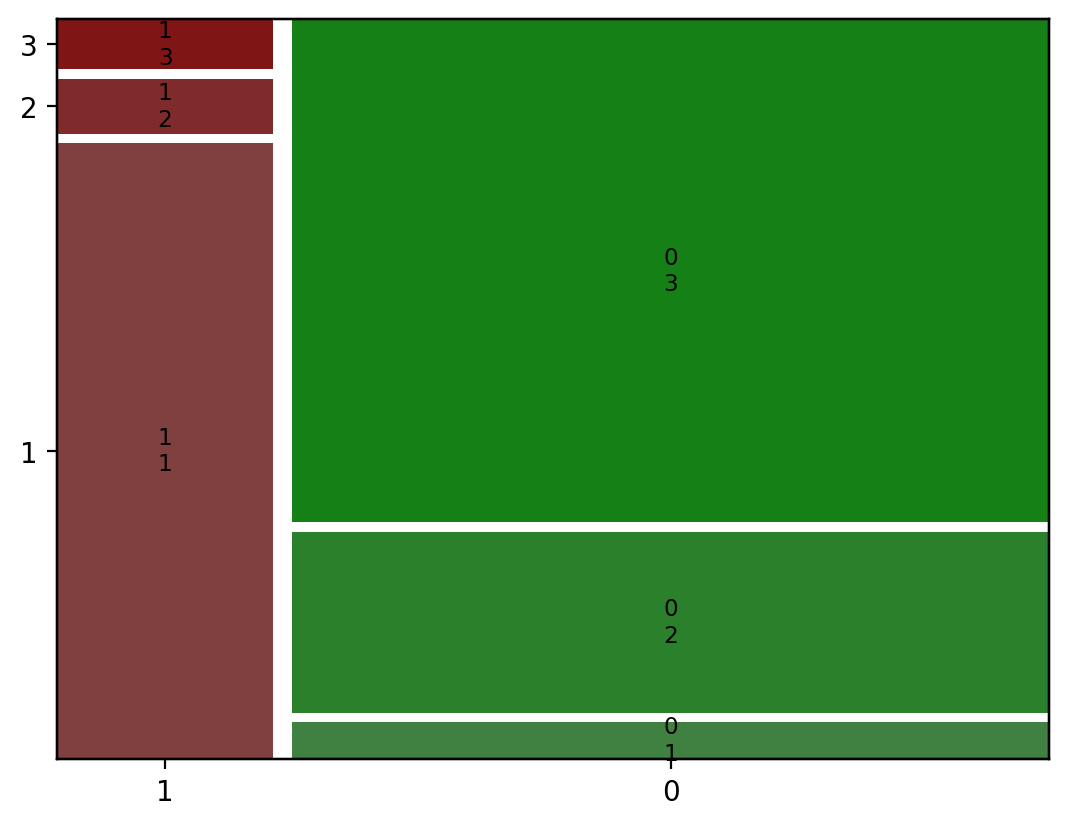

In [25]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(X_tr, ['hasDeck', 'pclass'],gap=0.02)
plt.show()

위의 그래프를 보면 pclass가 3 > 2 > 1 순으로 hasCabin이 0일 확률이 높다.    
즉, pclass가 1이면 Cabin값이 null이 아닐 확률이 높다는 뜻이다.

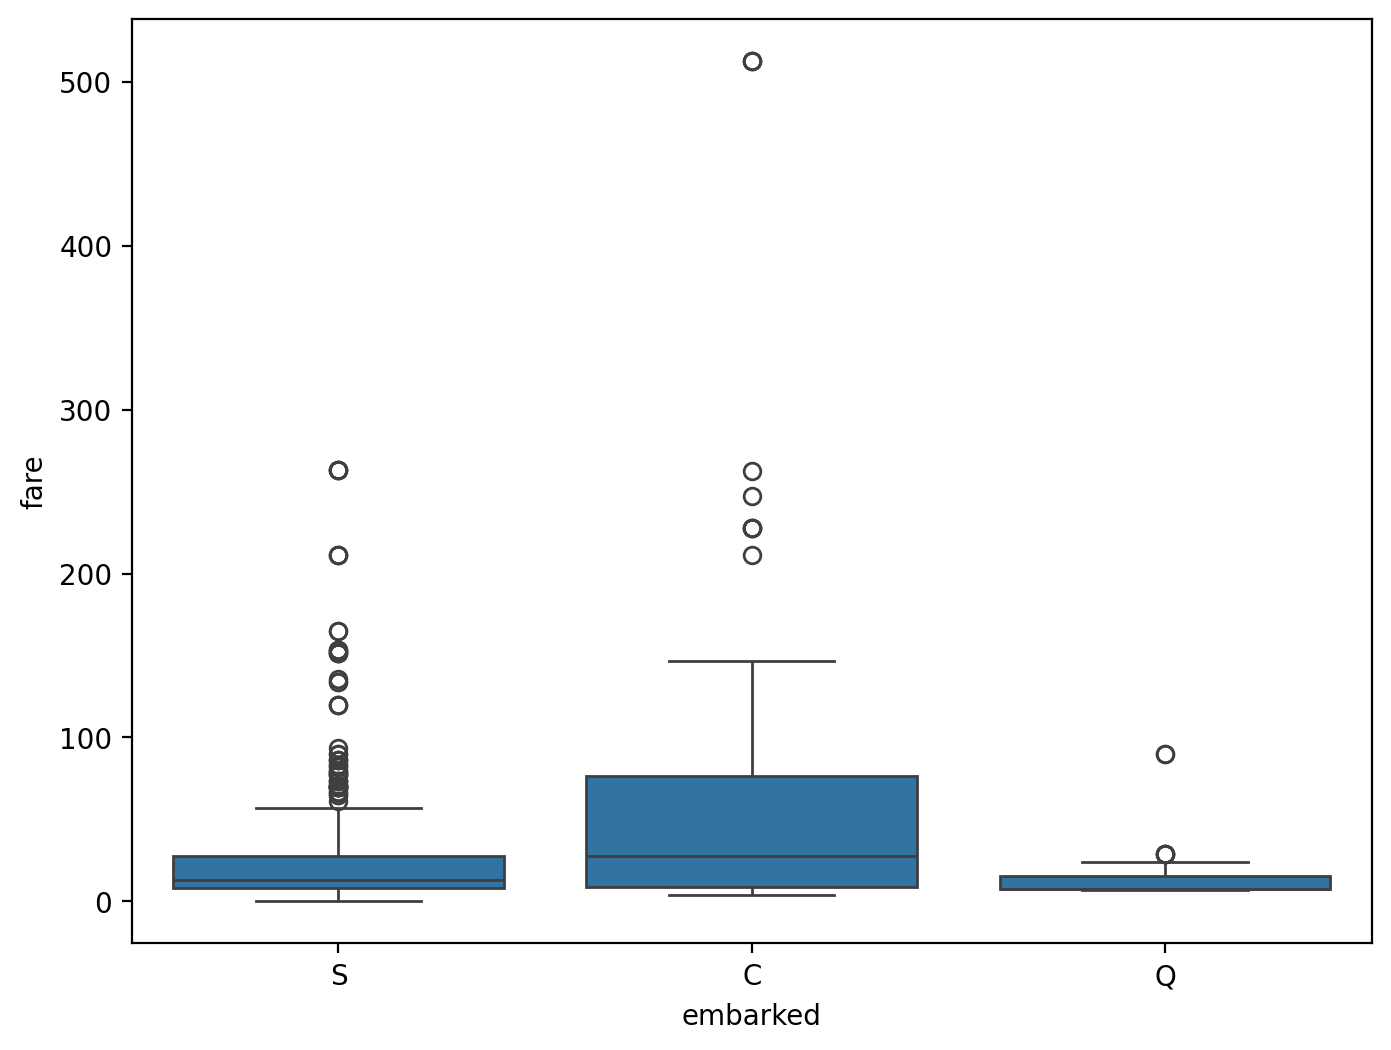

In [26]:
data = pd.concat([X_tr['fare'], X_tr['embarked']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='embarked', y="fare", data=data)

위의 그래프를 보면 embarked는 C > S > Q 순으로 fare가 높은 경향이 있다.

<Axes: xlabel='embarked', ylabel='fare'>

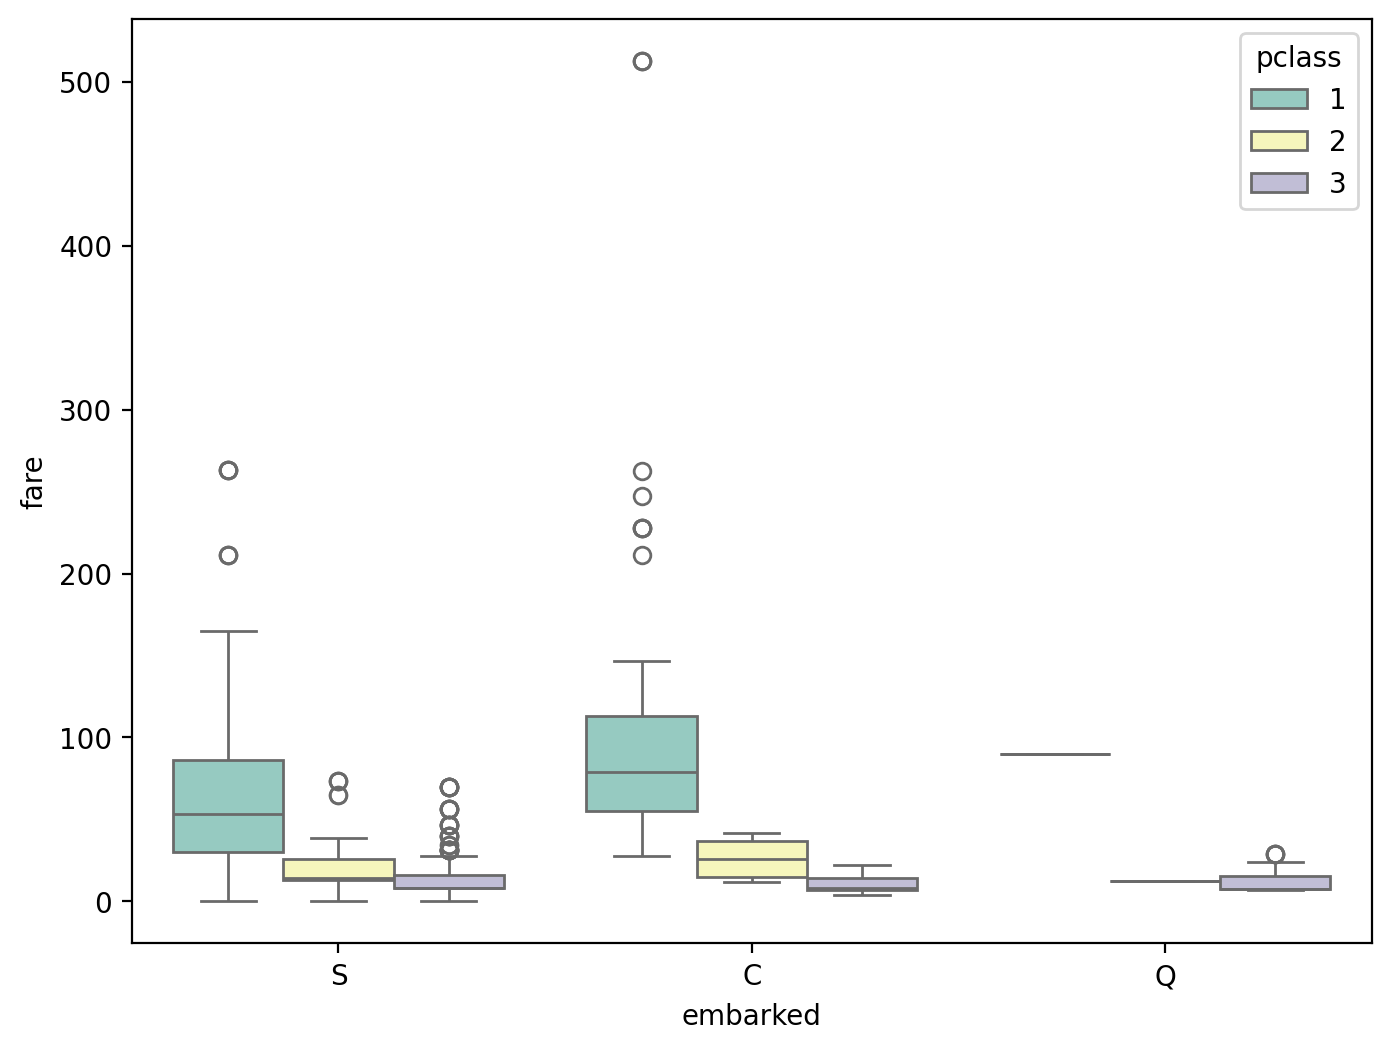

In [27]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="embarked", y="fare", hue="pclass",
               data=X_tr, palette="Set3")

위 그래프를 보면 embarked(C > S > Q)와 pclass (1 > 2 > 3)을 같이 적용하면, 더욱더 fare가 높은 경향을 보인다.

### 결측치 구간화
> 연속형 데이터를 범주형 데이터로 변경하면서 처리하는 기법

- 히스토그램 방식의 binning을 사용하여 인코딩을 하면 결측치를 없애지 않고 사용할 수 있습니다.
- 예를 들어 나이에 결측치가 많다면 나이가 적음, 중간, 많음 또는 10대, 20대, ... 80대 이상으로 구간화를 할 수 있습니다.
- 구간화를 하고 인코딩을 하면 결측치를 따로 채우지 않아도 되기 때문에 정보의 왜곡을 줄여 과대적합도 방지합니다.

#### 절대평가(pd.cut) vs 상대평가(pd.qcut)

In [29]:
tmp_train = X_tr.copy() # 깊은 복사

In [31]:
tmp_train['age_cut'] = pd.cut(tmp_train['age'].values, bins=4, labels=list(range(1,5)))
tmp_train['age_qcut'] = pd.qcut(tmp_train['age'].values, q=4, labels=list(range(1,5)))

print(tmp_train['age_cut'].isnull().sum())
print(tmp_train['age_cut'].value_counts())
print("=============================================")
print(tmp_train['age_qcut'].isnull().sum())
print(tmp_train['age_qcut'].value_counts())

140
age_cut
2    308
1    142
3    108
4     14
Name: count, dtype: int64
140
age_qcut
1    161
4    141
3    138
2    132
Name: count, dtype: int64


<Axes: xlabel='age_qcut', ylabel='count'>

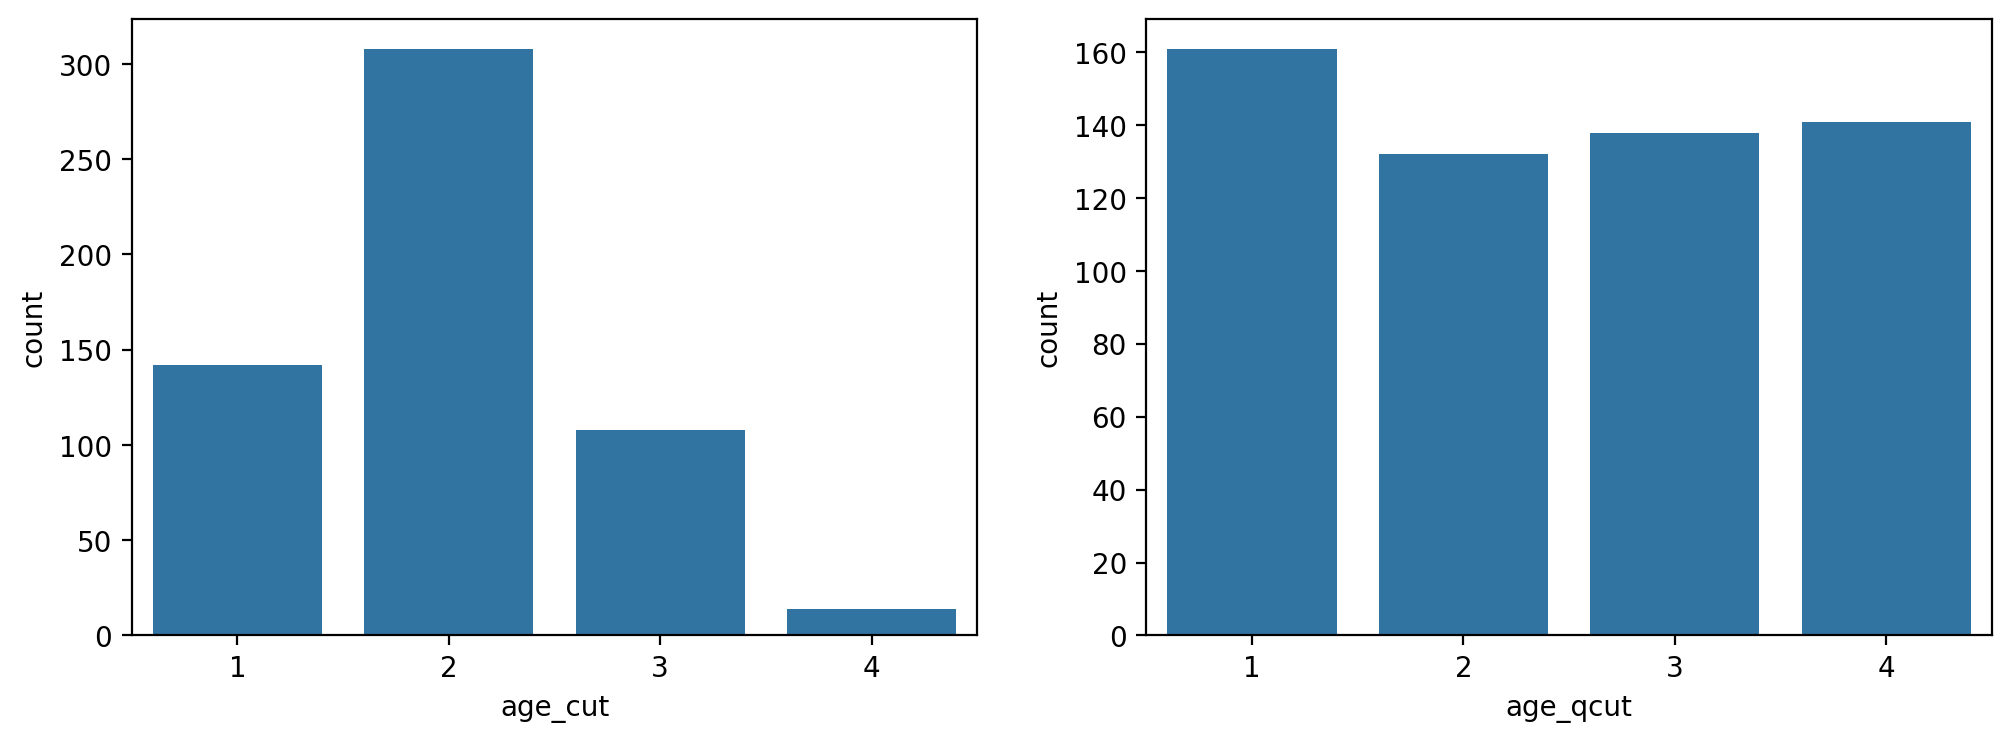

In [32]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

sns.countplot(data=tmp_train, x='age_cut', ax=axes[0])
sns.countplot(data=tmp_train, x='age_qcut', ax=axes[1])

### 결측치 처리

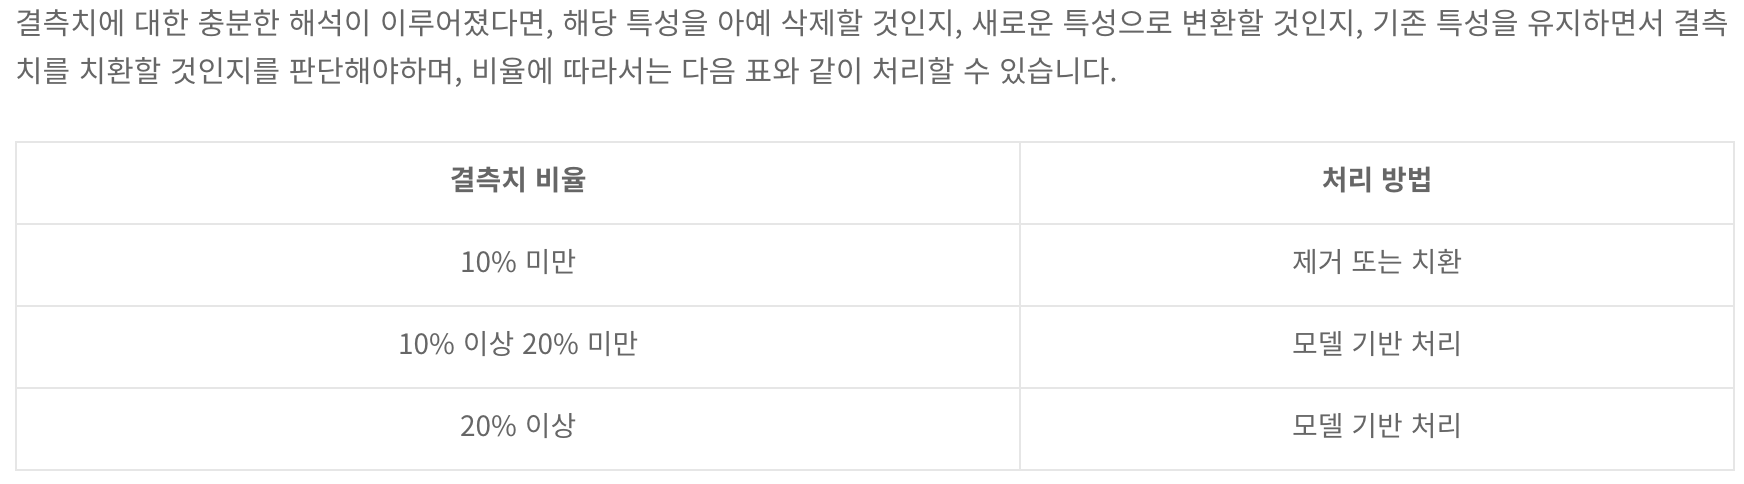

- 제거
  - 결측치가 발생한 행 또는 열을 삭제해버리는 가장 쉽고, 단순한 방식이다.
  - 그러나 당연하게도 이런 방식은 데이터의 손실(=표본 크기의 축소)로 이어집니다. 또한 경우에 따라 결측값을 무시하고 관측치만으로 분석을 시행할 경우 통계적 편향이 생길 가능성이 커지기에 조심히 시행되어야 합니다.
- 치환(합리적 접근)
  - 말 그대로 결측치를 적당한 방법으로 대체하는 것입니다.   
  - 데이터의 특성에 맞게 적당한 평균, 중간값, 최빈값 등으로 채울 수도 있으며, 다른 특성과 상관관계가 있을 경우 그에 맞는 값을 넣어 줄 수도 있습니다.(그러나 평균값 등으로 단순 대체하는 방법은 자료의 편향성을 높이고 특성들간의 상관관계를 왜곡할 수 있는 가장 안좋은 방법입니다.)  
  - 가령 월급특성에 결측치가 있는데, 연봉특성에는 값이 있는 경우 월급 결측치를 채우는 것이 수월할 것입니다. 이런 합리적 접근을 통한 치환 방법은 데이터에 대한 어느 정도의 도메인 지식이 있는 경우 굉장히 효율적으로, 그리고 정확하게 작동할 수 있습니다.
- 모델 기반 처리
  - 결측치를 예측하는 새로운 모델을 구성하고, 이를 기반으로 결측치를 채워나가는 방식입니다.  
  - 변수의 특성에 따라 Knn, PolyRegression 등의 방법을 시행할 수도 있습니다.

#### pandas 사용

- df.dropna()
  - df.dropna(axis=0): row 삭제
  - df.dropna(axis=1): column 삭제
  - df[['컬럼명']].dropna(axis=1): column 삭제
  - df.dropna(subset=['원하는 행']): 원하는 행의 결측값이 있는 부분을 기준으로 row 삭제
- df.fillna()
  - df[['컬럼명']].fillna(원하는 값): 원하는 값으로 채우기
  - df[['컬럼명']].fillna(method='ffill'): 결측값을 앞방향의 값으로 채운다.
  - df[['컬럼명']].fillna(method='bfill'): 결측값을 뒤방향의 값으로 채운다.
- np.where(pd.notnull(df['null값보유컬럼']==True, df['null값보유컬럼],df['null값없는컬럼'])
- df.replace()
  - list_df.replace(np.nan, 5): 결측값을 5로 변경
  - df.replace({'원하는 column 명' : 바꾸고싶은값}, {'원하는 column 명' : 새로운값})
- df.interpolate(method = 'values')
> 결측값을 선형으로 비례하는 방식으로 결측값 보간 =적절한 비율의 값으로 보간
- apply()
  - ```
#  lambda 함수 만들고 apply
fill_mean_func = lambda x: x.fillna(x.mean())
df.groupby('그룹하고싶은컬럼').apply(fill_mean_func)
  ```
  - ```
# 특정값 지정은 dict형식으로 한다 그룹화 한 값 'a', 'b'의 그룹에 채울 새로운값 지정
fill_values = {'a': 1.0, 'b':0.5}
# lambda 함수 지정
fill_func = lambda x: x.fillna(fill_values[x.name])
df.group('그룹화할col명').apply(fill_func)
  ```

##### 제거

- 행 제거 방법

In [34]:
print(f'before: {X_tr.shape} / isnull().sum(): {X_tr.isnull().sum().sum()}')

# 결측치가 있는 행 제거 : X_tr.dropna(axis=0)
df_droprows = X_tr.dropna(axis=0)
print(f'after: {df_droprows.shape} / isnull().sum(): {df_droprows.isnull().sum().sum()}')

before: (712, 16) / isnull().sum(): 698
after: (142, 16) / isnull().sum(): 0


- 열 제거 방법

In [35]:
print(f'before: {X_tr.shape} / isnull().sum(): {X_tr.isnull().sum().sum()}')
# 결측치가 있는 열 제거 : X_tr.dropna(axis=1)
df_dropcols = X_tr.dropna(axis=1)
print(f'after: {df_dropcols.shape} / isnull().sum(): {df_dropcols.isnull().sum().sum()}')

before: (712, 16) / isnull().sum(): 698
after: (712, 12) / isnull().sum(): 0


##### 수치형 치환

In [36]:
X_tr['age_mean'] = X_tr['age'].fillna(X_tr['age'].mean())
X_tr['age_median'] = X_tr['age'].fillna(X_tr['age'].median())

In [37]:
X_tr[['age_mean', 'age_median']].isnull().sum().sum()

0

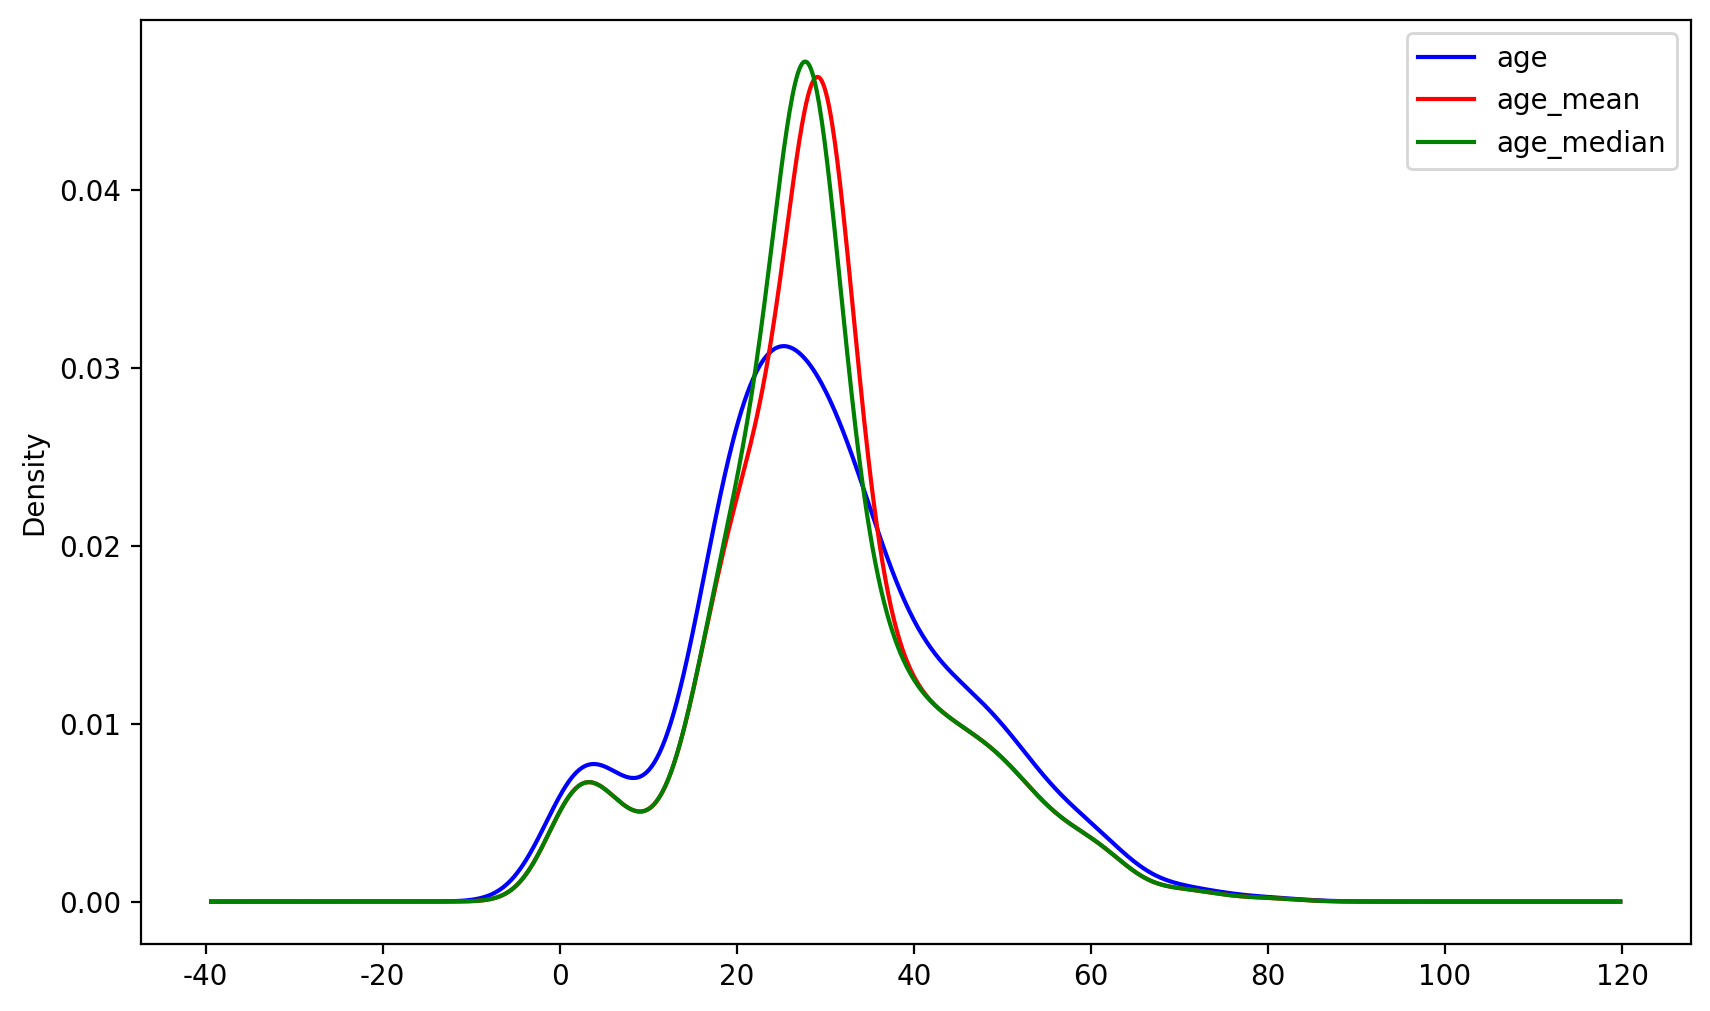

In [38]:
# 분포 시각화
fig, ax = plt.subplots(figsize=(10,6))

X_tr['age'].plot(kind='kde', ax=ax, color='blue')
X_tr['age_mean'].plot(kind='kde', ax=ax, color='red')
X_tr['age_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

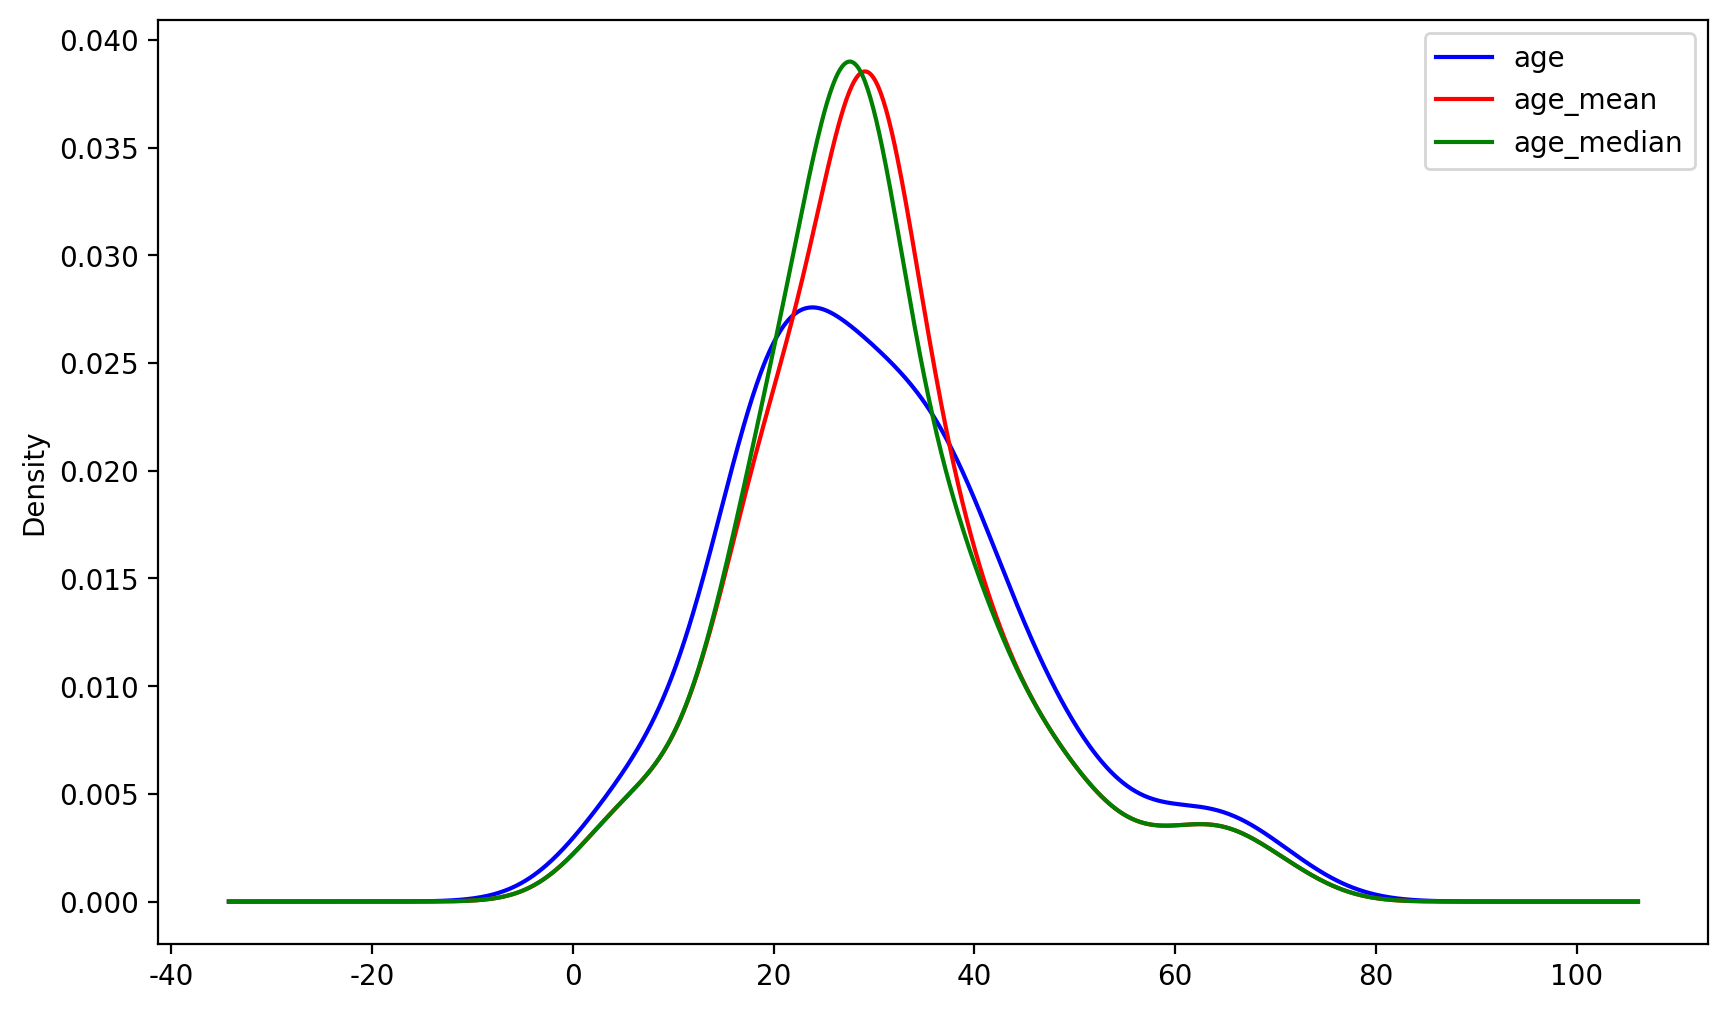

In [39]:
X_te['age_mean'] = X_te['age'].fillna(X_tr['age'].mean())
X_te['age_median'] = X_te['age'].fillna(X_tr['age'].median())

# 분포 시각화
fig, ax = plt.subplots(figsize=(10,6))

X_te['age'].plot(kind='kde', ax=ax, color='blue')
X_te['age_mean'].plot(kind='kde', ax=ax, color='red')
X_te['age_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

위의 그래프는 원래의 분포와 mean/median 분포가 다른 것을 볼 수 있다.   
즉, 단순 mean/median으로 결측치 처리를 하면 기존 데이터의 분포가 변형이 된다는 것을 확인할 수 있다.

In [50]:
X_tr['age_random'] = X_tr['age']

# random sampling
random_sampling = (X_tr['age'].dropna().sample(X_tr['age'].isnull().sum()))

random_sampling.index = X_tr[lambda x: x['age'].isnull()].index # index 부여

# NA imputation
X_tr.loc[X_tr['age'].isnull(), 'age_random'] = random_sampling

# 확인
X_tr[['age', 'age_random']].isnull().sum()

,0
age,140
age_random,0


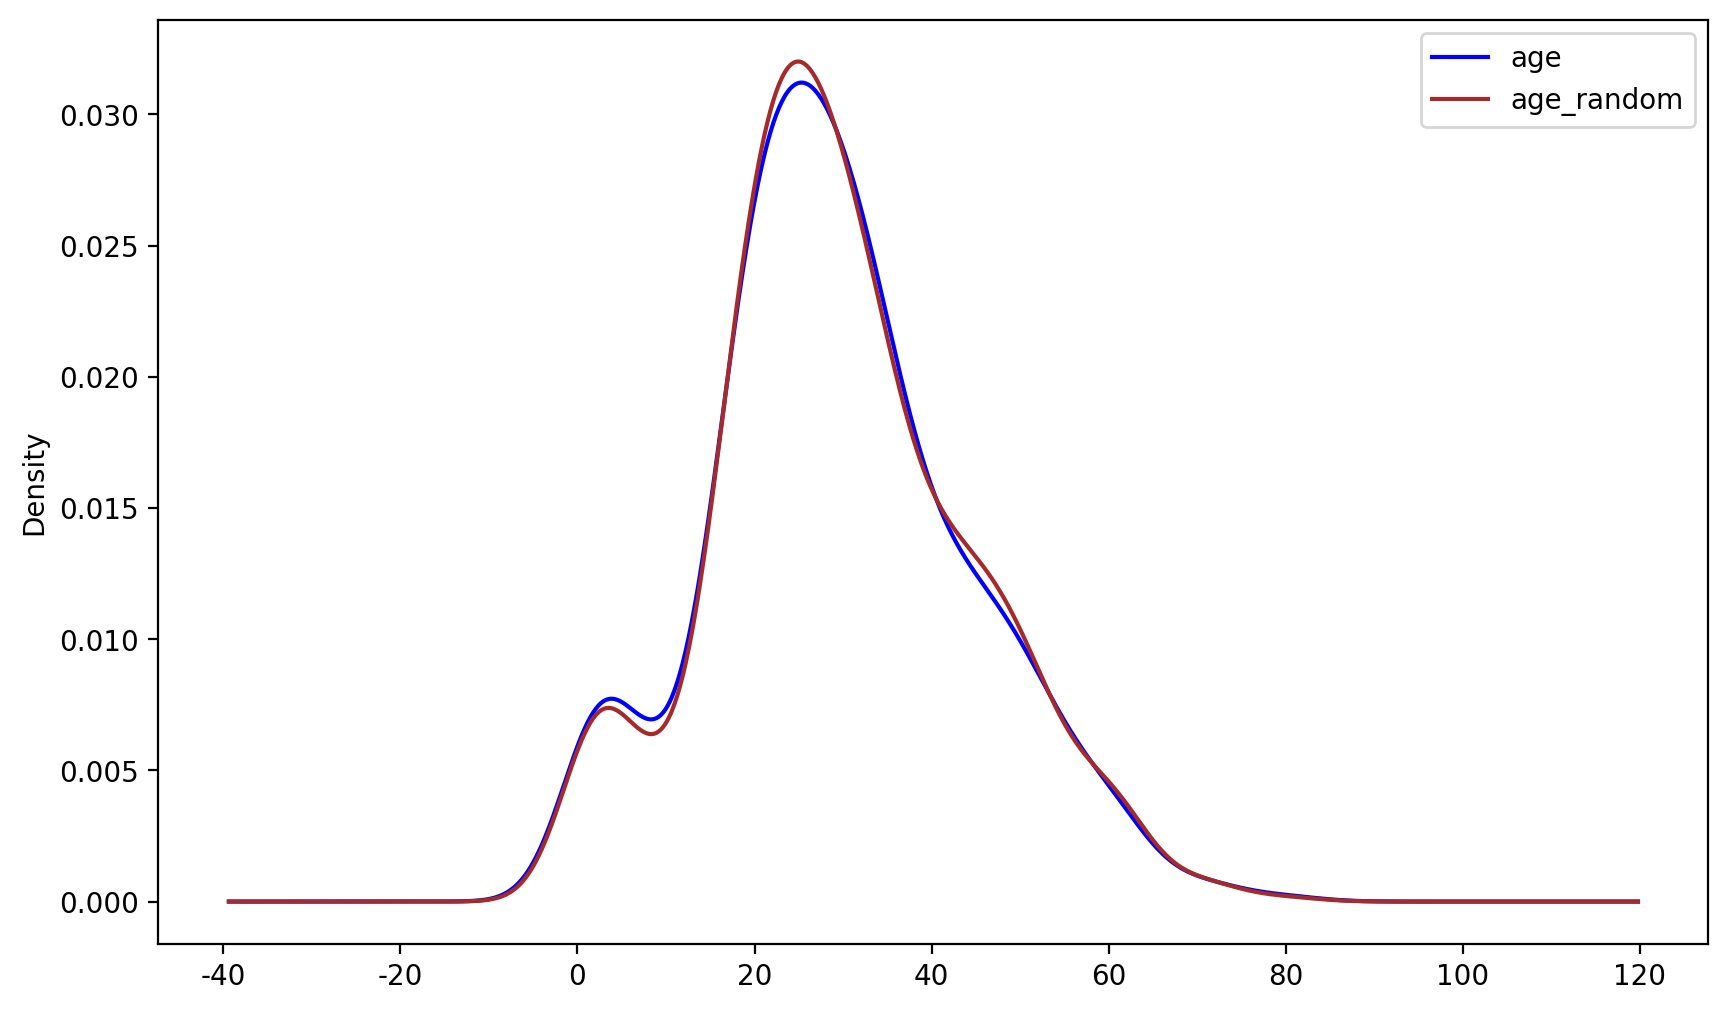

In [51]:
# 분포 시각화
fig, ax = plt.subplots(figsize=(10,6))

X_tr['age'].plot(kind='kde', ax=ax, color='blue')
X_tr['age_random'].plot(kind='kde', ax=ax, color='brown')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

age           37
age_random     0
dtype: int64


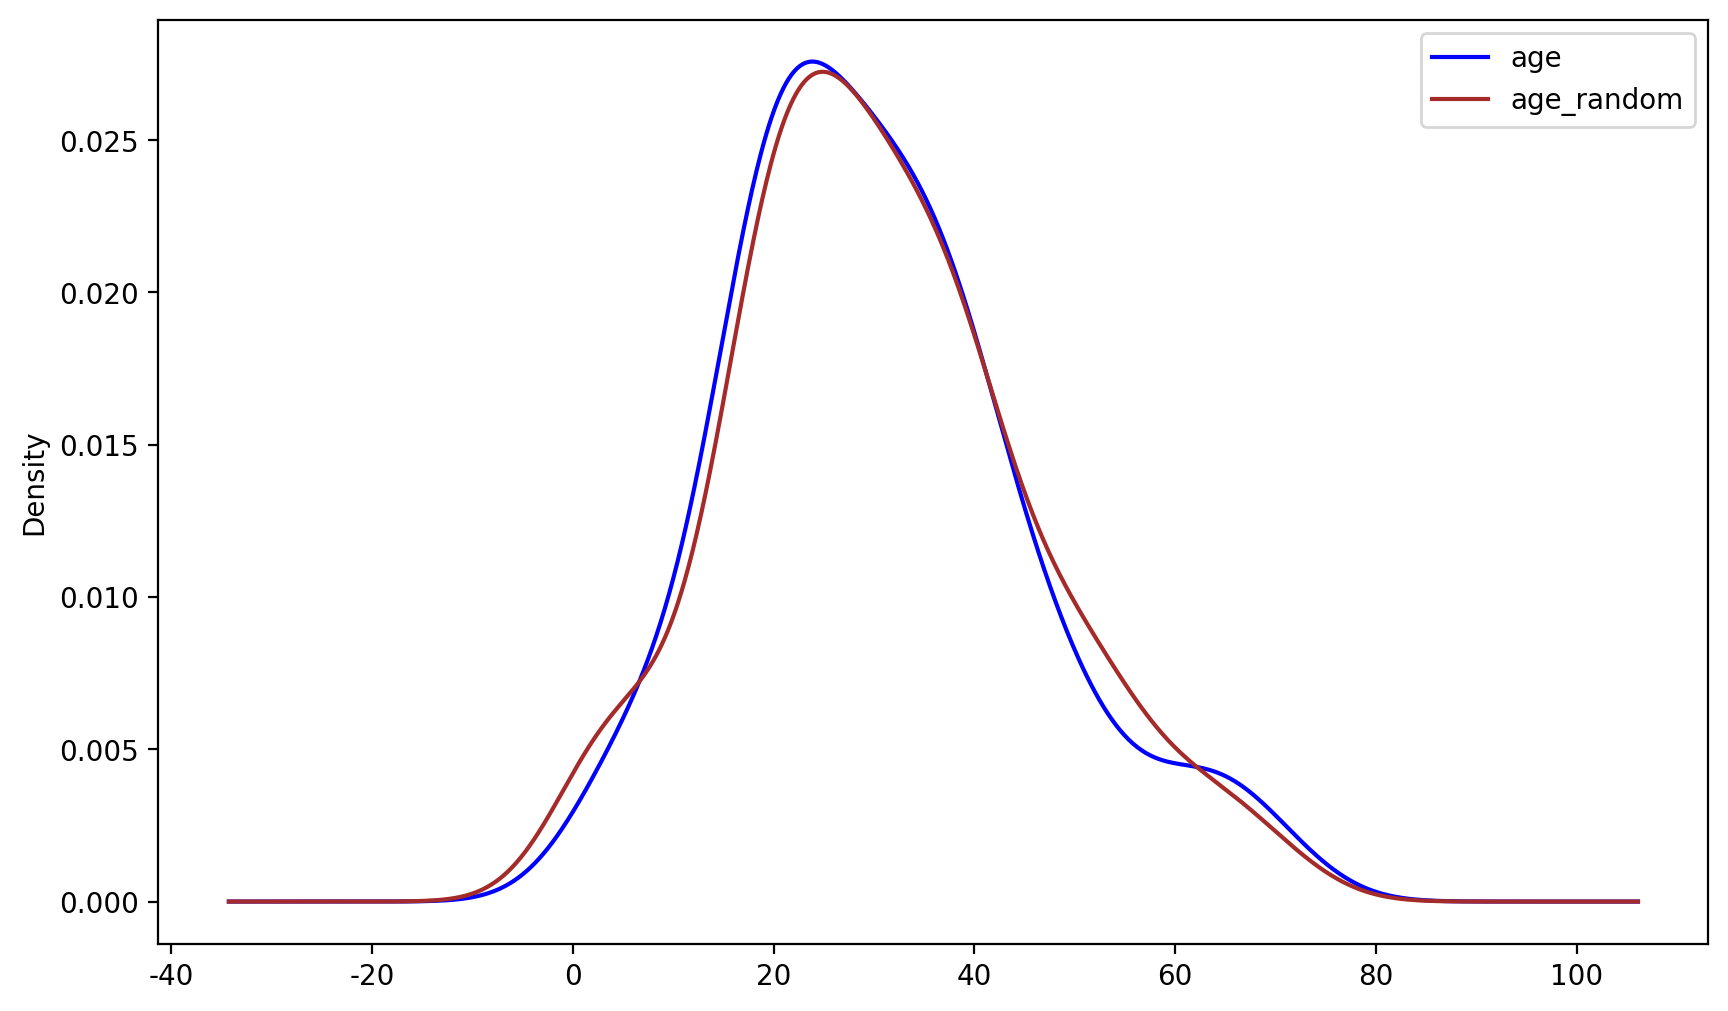

In [52]:
X_te['age_random'] = X_te['age']

# random sampling
random_sampling = (X_tr['age'].dropna().sample(X_te['age'].isnull().sum()))
random_sampling.index = X_te[lambda x: x['age'].isnull()].index # index 부여

# NA imputation
X_te.loc[X_te['age'].isnull(), 'age_random'] = random_sampling

# 확인
print(X_te[['age', 'age_random']].isnull().sum())

# 분포 시각화
fig, ax = plt.subplots(figsize=(10,6))

X_te['age'].plot(kind='kde', ax=ax, color='blue')
X_te['age_random'].plot(kind='kde', ax=ax, color='brown')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

위의 그래프를 보면 mean/median과 달리 random sample imputation의 경우 원래의 분산 및 분포를 보존한다는 장점을 확인할 수 있다.

##### 범주형 치환

In [53]:
# 범주 별 빈도 수 확인
X_tr['embarked'].value_counts(dropna=False)

,count
embarked,
S,525
C,125
Q,60
NaN,2


In [54]:
X_tr['embarked'].mode()

,embarked
0,S


In [56]:
embarked_mode = X_tr['embarked'].mode().values[0]
embarked_mode

'S'

In [57]:
# 최빈값
embarked_mode = X_tr['embarked'].mode().values[0]

# NA imputation
X_tr['embarked_filled'] = X_tr['embarked'].fillna(embarked_mode)
X_te['embarked_filled'] = X_te['embarked'].fillna(embarked_mode)

# 확인
print(X_tr[['embarked', 'embarked_filled']].isnull().sum())
print('-'*50)
print(X_te[['embarked', 'embarked_filled']].isnull().sum())

embarked           2
embarked_filled    0
dtype: int64
--------------------------------------------------
embarked           0
embarked_filled    0
dtype: int64


#### sklearn 사용

##### SimpleImputer; 치환

파라미터
- missing_values: default값은 np.nan으로 비어있는 값을 채우게 되고 필요시 다른 값을 빈값으로 인식하게 할 수 있다.  
- strategy: 채울 값에 대한 함수; mean, median, most_frequent, constant(따로 지정한 값)
- fill_value: strategy의 값이 constant일 때, 여기에 정의된 값으로 채움

In [58]:
from sklearn.impute import SimpleImputer

# strategy = mean, median, most_frequent
imputer = SimpleImputer(strategy="mean")

X_tr['age_simple_mean'] = imputer.fit_transform(X_tr[["age"]])
X_te['age_simple_mean'] = imputer.transform(X_te[["age"]])

X_tr[['age', 'age_simple_mean']].isnull().sum()

,0
age,140
age_simple_mean,0


##### KNNImputer; 모델 기반

In [59]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

X_tr['age_knn'] = imputer.fit_transform(X_tr[["age"]])
X_te['age_knn'] = imputer.transform(X_te[["age"]])

X_tr[['age', 'age_knn']].isnull().sum()

,0
age,140
age_knn,0


##### IterativeImputer; 모델 기반

In [60]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=SEED)

X_tr['age_iter_none'] = imputer.fit_transform(X_tr[["age"]])
X_te['age_iter_none'] = imputer.transform(X_te[["age"]])

X_tr[['age', 'age_iter_none']].isnull().sum()

,0
age,140
age_iter_none,0


In [62]:
from sklearn.ensemble import RandomForestRegressor

imputer = IterativeImputer(
    estimator=RandomForestRegressor(verbose=0, random_state=SEED),
    max_iter=10, verbose=0,
    imputation_order='ascending', random_state=SEED)

X_tr['age_iter_none'] = imputer.fit_transform(X_tr[["age"]])
X_te['age_iter_none'] = imputer.transform(X_te[["age"]])

X_tr[['age', 'age_iter_none']].isnull().sum()

,0
age,140
age_iter_none,0


## 비대칭 데이터(옵션)
- 왜도, 첨도

### 비대칭 데이터 확인

In [63]:
# 왜도
df['fare'].skew()

4.570768460673977

In [64]:
# 첨도
df['fare'].kurt()

30.20805166179377

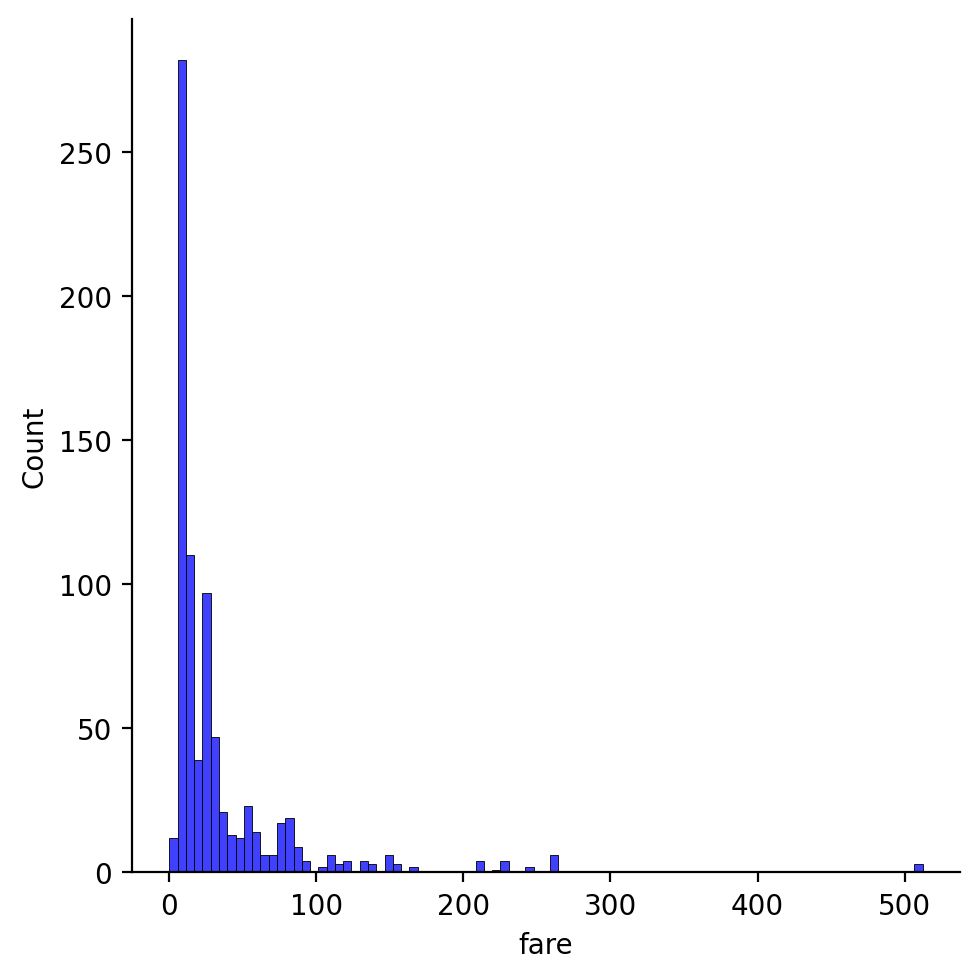

In [65]:
sns.displot(df["fare"], color="b", label="Skewness : %.2f"%(df["fare"].skew()))

### 비대칭 데이터 처리

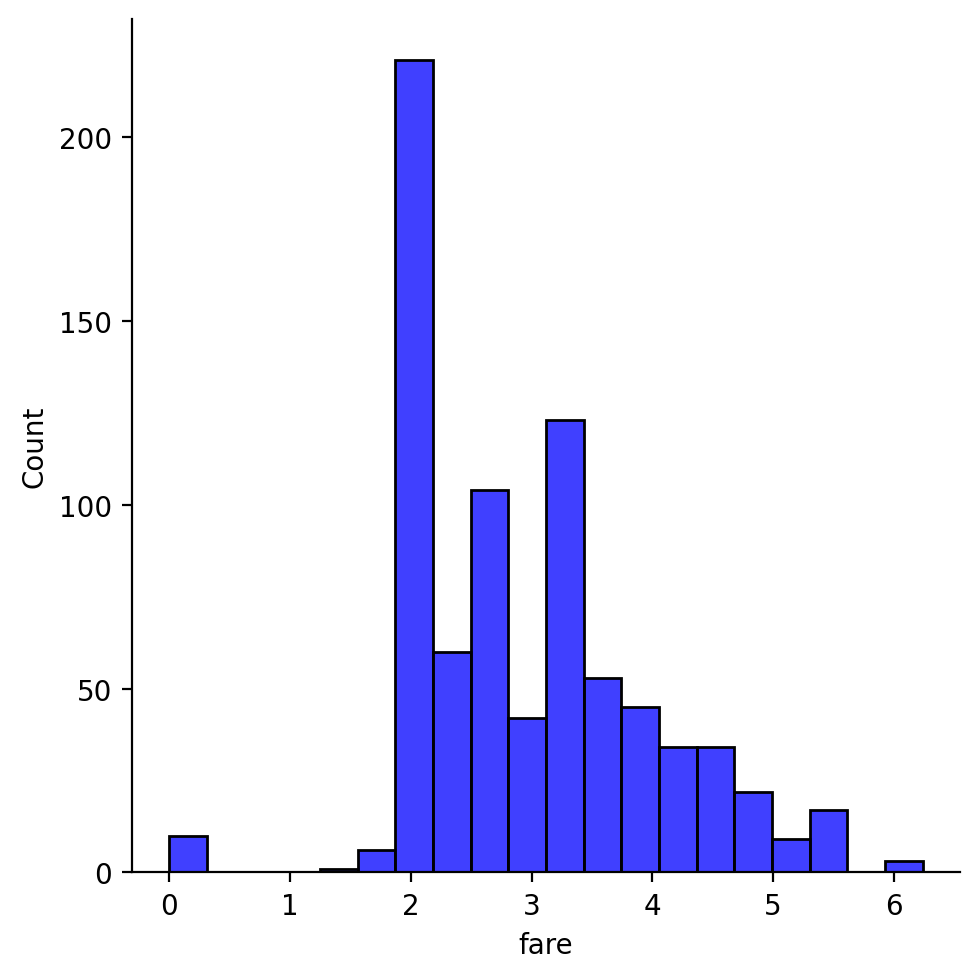

In [66]:
df["fare"] = df["fare"].map(lambda i: np.log(i) if i > 0 else 0) # log를 이용하여 비대칭 처리
sns.displot(df["fare"], color="b", label="Skewness : %.2f"%(df["fare"].skew()))

In [67]:
df['fare'].skew(), df['fare'].kurt()

(0.44180329763623455, 0.4696485867791105)

## 이상치(옵션)

### 이상치 확인

In [68]:
df['age'].skew(), df['age'].kurt()

(0.3674542095476674, 0.09072738061837127)

<Axes: ylabel='age'>

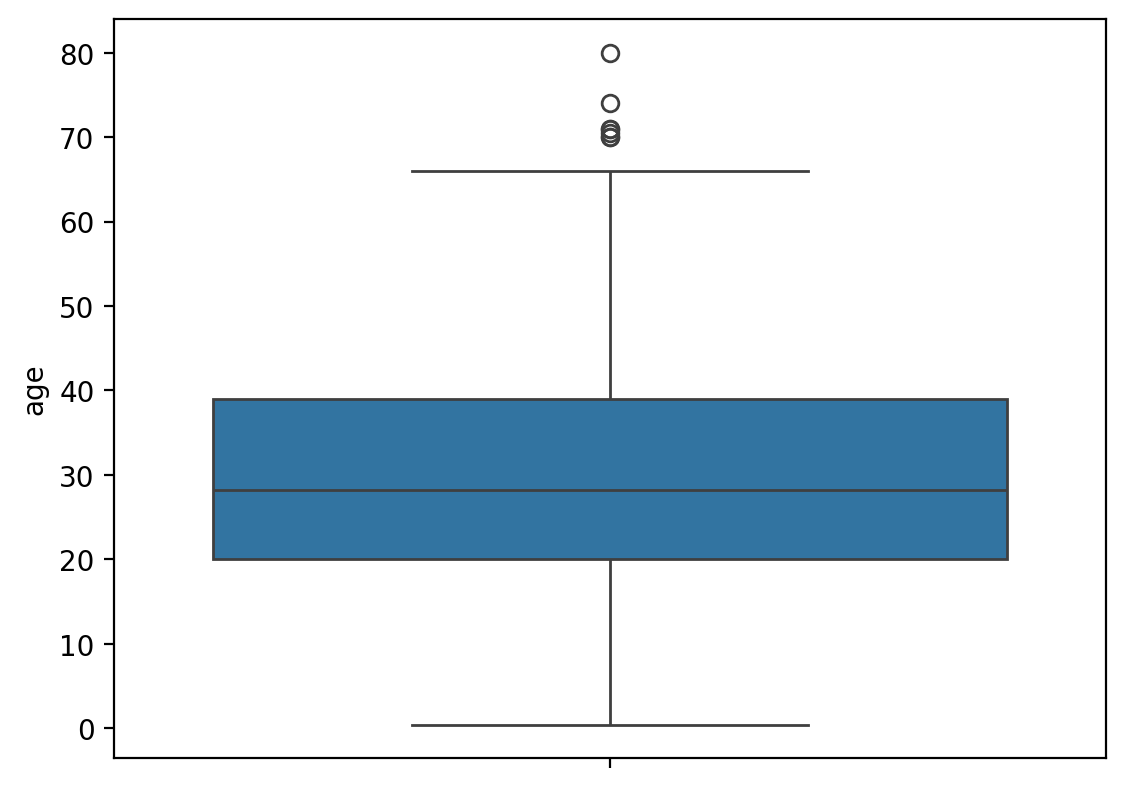

In [69]:
sns.boxplot(y=df['age'], data=df)

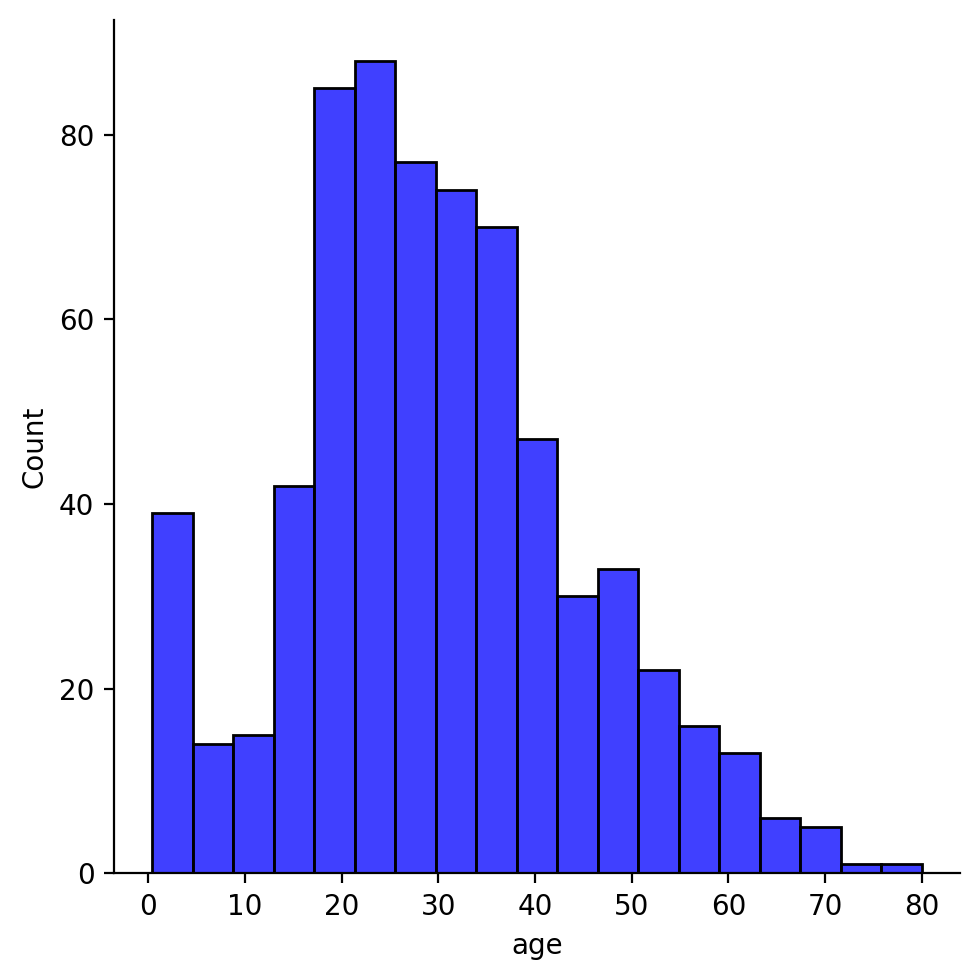

In [70]:
sns.displot(df["age"], color="b", label="Skewness : %.2f"%(df["age"].skew()))

<Axes: xlabel='survived', ylabel='age'>

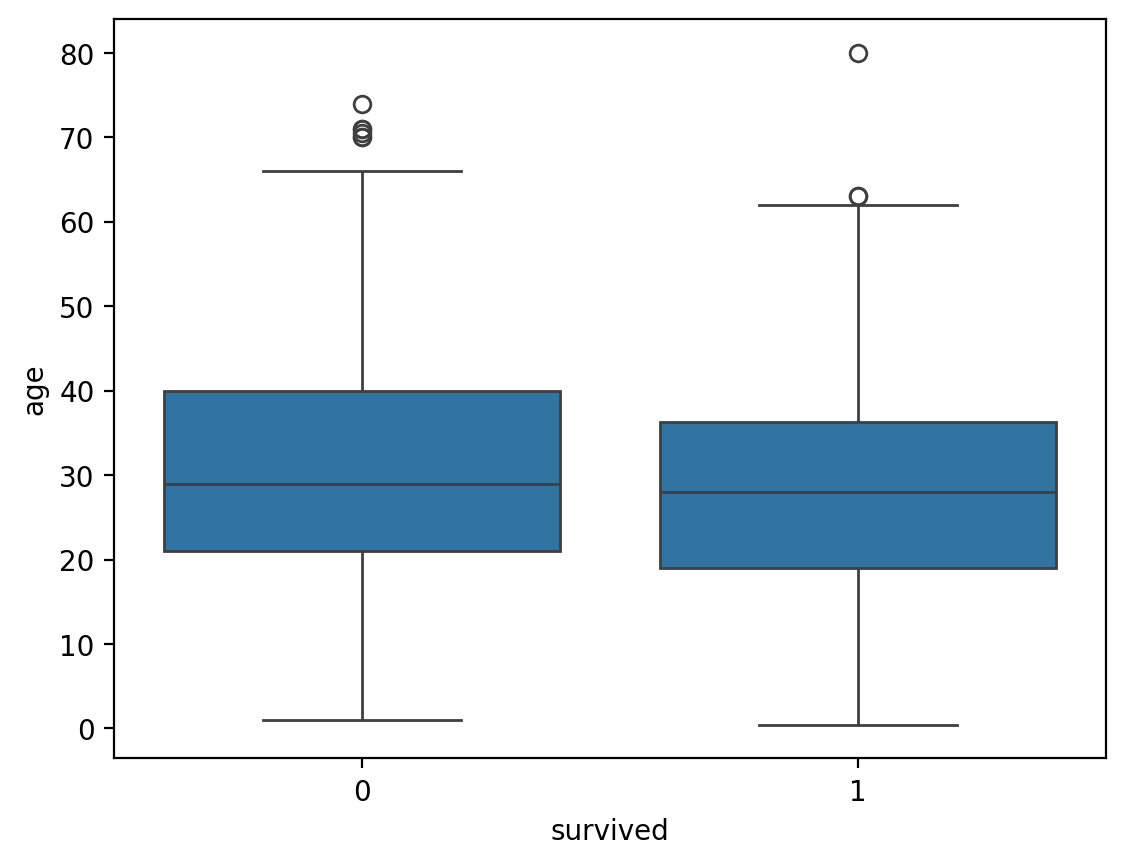

In [71]:
sns.boxplot(x=df['survived'], y=df['age'], data=df)

In [74]:
df.groupby(['survived'])['age'].quantile([0.25, 0.5, 0.75]) # 분위수 계산

survived      
0         0.25    21.00
          0.50    29.00
          0.75    40.00
1         0.25    19.00
          0.50    28.00
          0.75    36.25
Name: age, dtype: float64

<Axes: ylabel='age'>

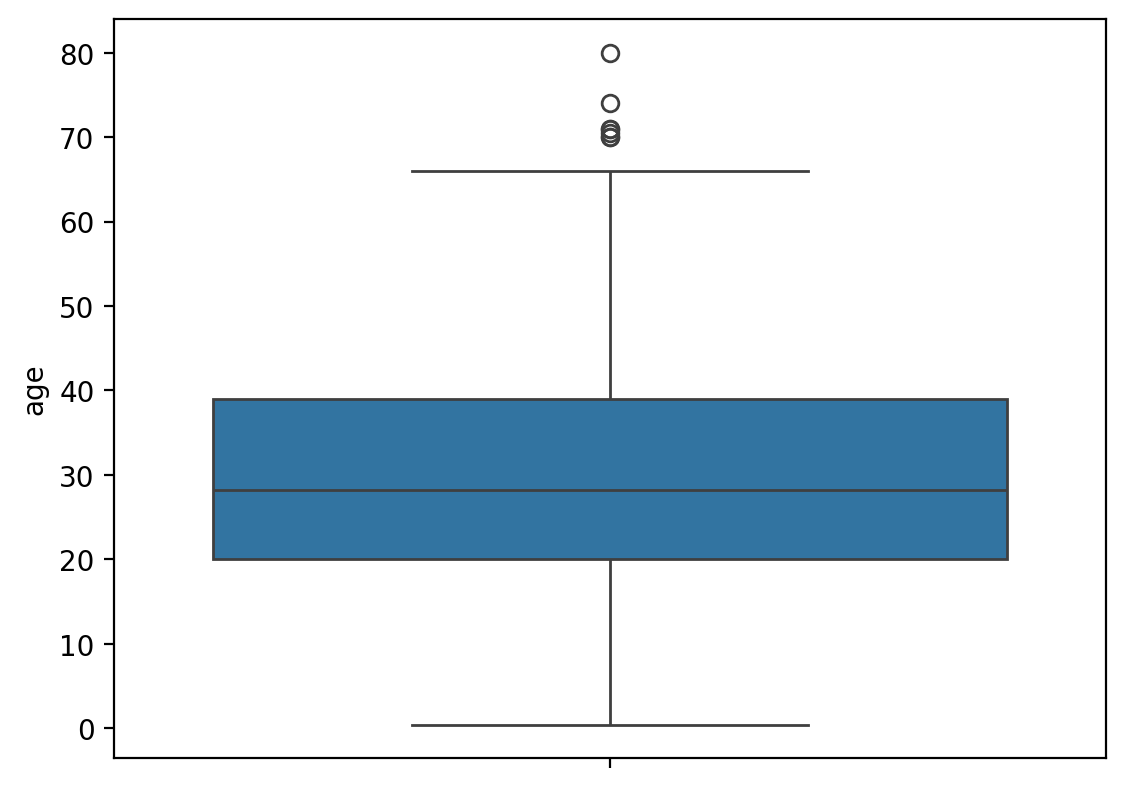

In [76]:
sns.boxplot(y=df['age'], data=df)

In [77]:
quantiles = df['age'].quantile([0.25, 0.75]).values

IQR = quantiles[1] - quantiles[0]
Upper_boundary = quantiles[1] + 1.5*IQR
Lower_boundary = quantiles[0] - 1.5*IQR
print('age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

age outliers are values < -8.5 or > 67.5


In [78]:
cond1 = df['age'] > Upper_boundary
cond2 = df['age'] < Lower_boundary

cond = cond1 | cond2
outlier = df.loc[cond]
print(outlier.shape, df.shape)
outlier.head()

(7, 15) (784, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
91,0,1,male,71.0,0,0,3.545419,C,First,man,True,A,Cherbourg,no,True
110,0,3,male,70.5,0,0,2.047693,Q,Third,man,True,NaN,Queenstown,no,True
443,0,1,male,71.0,0,0,3.902058,C,First,man,True,NaN,Cherbourg,no,True
561,1,1,male,80.0,0,0,3.401197,S,First,man,True,A,Southampton,yes,True
594,0,2,male,70.0,0,0,2.351375,S,Second,man,True,NaN,Southampton,no,True


In [79]:
c1 = outlier['age'] >= Lower_boundary
c2 = outlier['age'] <= Upper_boundary

c = c1 & c2

outlier.loc[c].shape

(0, 15)

### 이상치 처리

In [80]:
df['age'] = df['age'].map(
    lambda x: Upper_boundary if x > Upper_boundary else x)

df['age'] = df['age'].map(
    lambda x: Lower_boundary if x < Lower_boundary else x)

In [81]:
cond1 = df['age'] > Upper_boundary
cond2 = df['age'] < Lower_boundary

cond = cond1 | cond2
outlier = df.loc[cond]
print(outlier.shape, df.shape)
outlier.head()

(0, 15) (784, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


<Axes: ylabel='age'>

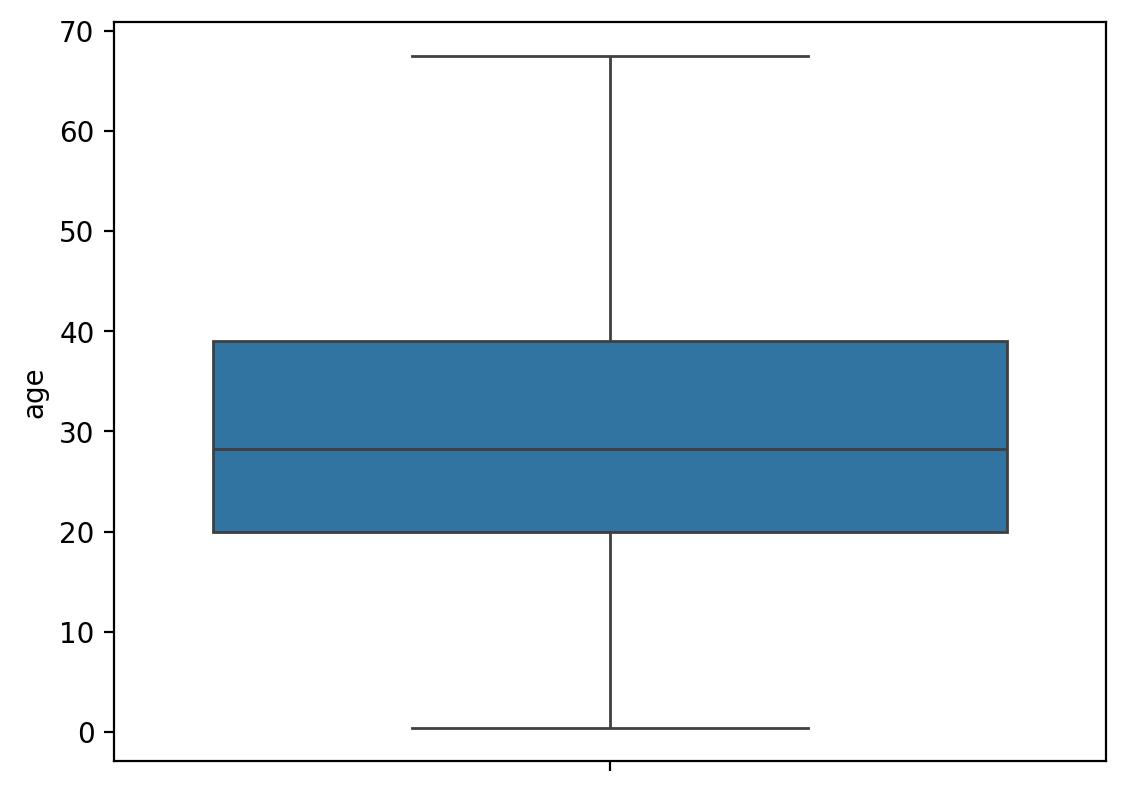

In [82]:
sns.boxplot(y=df['age'], data=df)

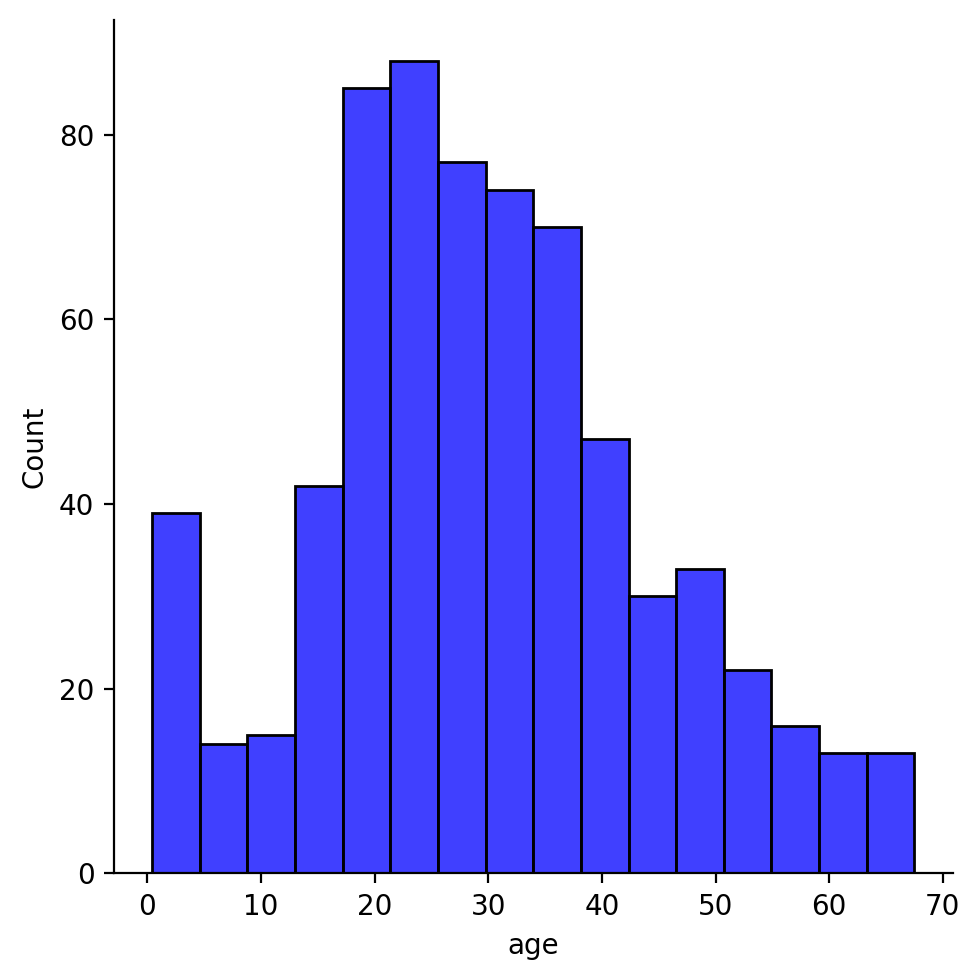

In [83]:
sns.displot(df["age"], color="b", label="Skewness : %.2f"%(df["age"].skew()))

<Axes: xlabel='survived', ylabel='age'>

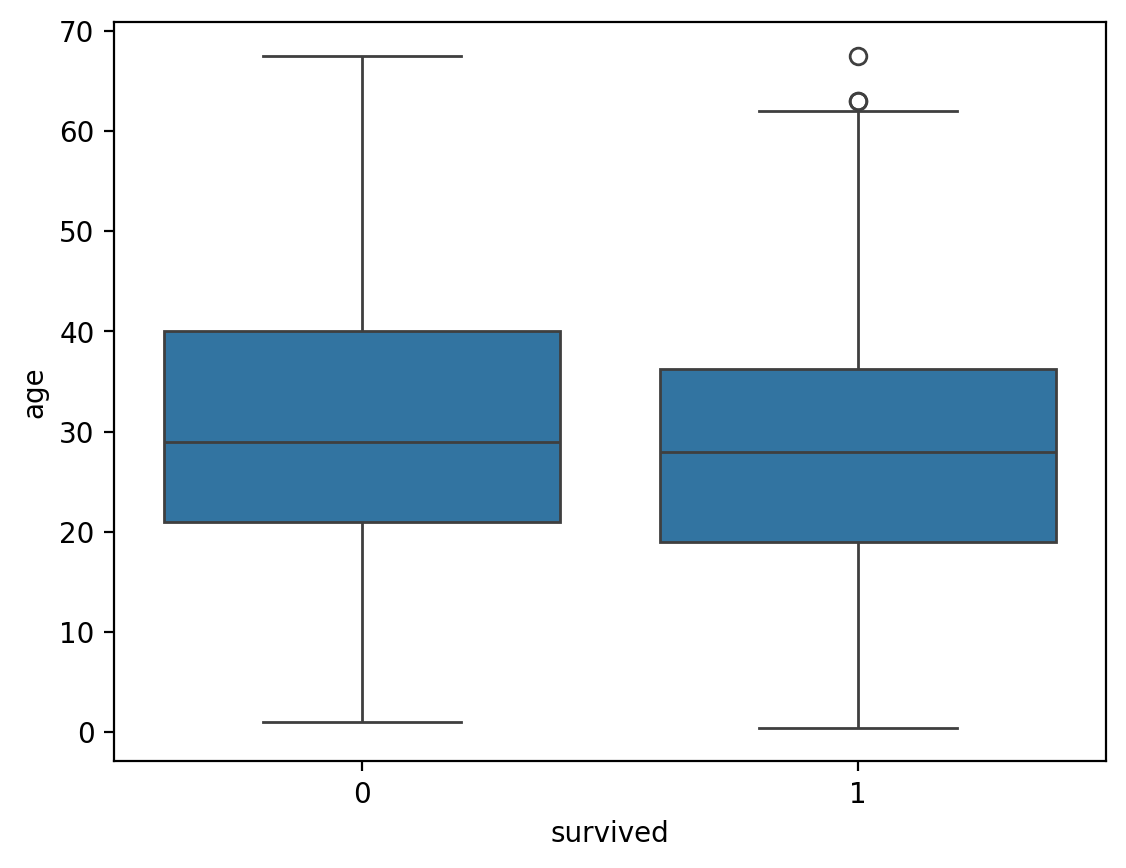

In [84]:
sns.boxplot(x=df['survived'], y=df['age'], data=df)